### The `alpha` parameter in `geom_imshow()`

In [1]:
import numpy as np

from lets_plot import *

In [2]:
LetsPlot.setup_html()

In [3]:
# Load an image

from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png')

image = Image.open(BytesIO(response.content))
im_arr = np.asarray(image)
im_arr.shape

(225, 225, 3)

In [4]:
p = ggplot() + geom_point(x=112, y=112, color="dark-blue", size=100, shape=15) + ggsize(450, 450)
p + ggtitle("The background blue square") + ggsize(400, 300)

#### 1. `alpha` parameter and color image


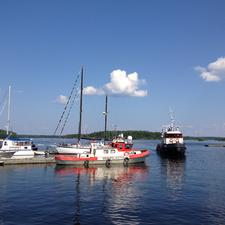
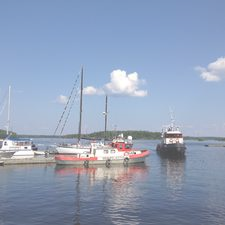

In [5]:
gggrid([
    p + geom_imshow(im_arr) + ggtitle("no alpha (opaque image)"),
    p + geom_imshow(im_arr, alpha=0.7) + ggtitle("alpha=0.7")
]) + ggsize(1000, 500)

#### 2. `alpha` parameter and grayscale image

In [6]:
im_arr_gs = im_arr[:,:,0]
im_arr_gs.shape

(225, 225)


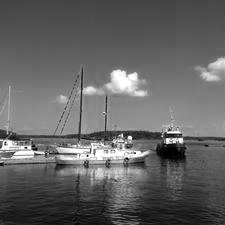
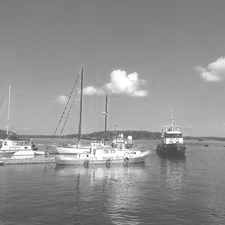

In [7]:
gggrid([
    p + geom_imshow(im_arr_gs) + ggtitle("no alpha (opaque image)"),
    p + geom_imshow(im_arr_gs, alpha=0.7) + ggtitle("alpha=0.7"),
]) + ggsize(1000, 500)

#### 3. `alpha` parameter and pseudo-color image


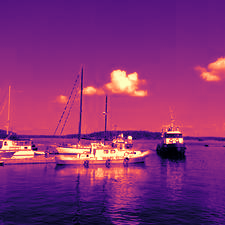
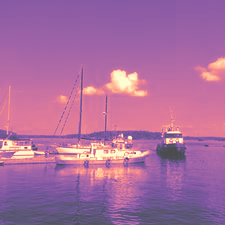

In [8]:
gggrid([
    p + geom_imshow(im_arr_gs, "magma") + ggtitle("no alpha (opaque image)"),
    p + geom_imshow(im_arr_gs, "magma", alpha=0.7) + ggtitle("alpha=0.7"),
]) + ggsize(1000, 500)

#### 4. `alpha` parameter and grayscale image with transparent pixels (`NaN` values)

In [9]:
im_arr_gs_nan=im_arr_gs.copy()
im_arr_gs_nan=im_arr_gs_nan.astype(np.float64)
im_arr_gs_nan[im_arr_gs_nan < 80] = np.nan


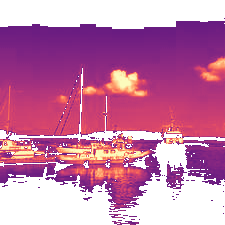
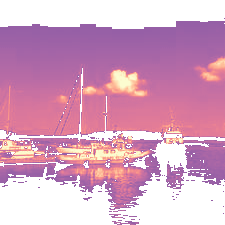

In [10]:
gggrid([
    p + geom_imshow(im_arr_gs_nan, "magma", norm=False) + ggtitle("no alpha (opaque image)"),
    p + geom_imshow(im_arr_gs_nan, "magma", norm=False, alpha=0.7) + ggtitle("alpha=0.7"),
]) + ggsize(1000, 500)